In [5]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [6]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8,
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [8]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [9]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
clf.score(X_test, y_test)

0.95614035087719296

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
accuracy_score(y_test, y_pred)

0.95614035087719296

In [14]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]])

In [15]:
clf.decision_function(X_test[12:15]) # 識別器にかけた時の生の値 正負でクラスを判定できる。
#  識別境界(w.T * x + b = 0)との距離 w.T * x 　を表す?

array([ 5.5217715 , -1.16447765,  1.4061065 ])

In [16]:
clf.predict_proba(X_test[12:15])  # 識別器にかけた時,その値がどのクラスに属するかが確率的解釈でできる。shape=(n_sample , クラス数)
# ロジスティック関数の出力 ? 

array([[ 0.00398283,  0.99601717],
       [ 0.76214537,  0.23785463],
       [ 0.19684889,  0.80315111]])

In [17]:
clf.predict(X_test[12:15])

array([1, 0, 1])

In [18]:
(clf.decision_function(X_test[12:15]) > 0).astype(int)

array([1, 0, 1])

In [19]:
np.array([True, False]).astype(int)

array([1, 0])

In [20]:
(clf.decision_function(X_test[12:15]) > 0.5).astype(int) * 2 - 1  # threshold 閾値を色々と変化させることができる。

array([ 1, -1,  1])

In [21]:
y_test[12:15]

array([1, 1, 1])

In [22]:
(clf.decision_function(X_test[12:15]) > -2).astype(int) # threshold=-2

array([1, 1, 1])

In [23]:
(clf.decision_function(X_test[12:15]) > 2).astype(int) # threshold=2

array([1, 0, 0])

In [24]:
for th in range(-3,7): # thresholdを -3~7 まで変化させる
    print(th, (clf.decision_function(X_test[12:15]) > th).astype(int))

-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


threshold を変化させても識別結果に変化のないのが良い識別器と言える

In [25]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve, roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

AUC =  0.994283899651
AUC =  0.994283899651


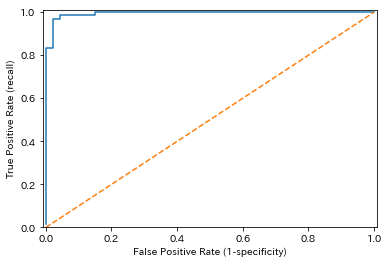

In [26]:
test_score = clf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, test_score) #  偽陽性率, 真陽性率, それらでのthreshold　が返される。

plt.plot(fpr, tpr)
print("AUC = ", auc(fpr, tpr)) # Area Under Curve : ROC曲線の下側の面積を計算する。
print("AUC = ", roc_auc_score(y_test, test_score)) # 上の関数と同様　引数が異なる。 真のクラスラベルと予測ラベルを渡すことができる。
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

In [27]:
thresholds # decision_functionのしきい値(threshold)を減少させていくリスト

array([  9.46715683,   2.04035426,   1.78199897,  -0.54241801,
        -0.70758966,  -1.16447765,  -2.33577584,  -2.64194225, -41.54830105])

Text(0,0.5,'Precision')

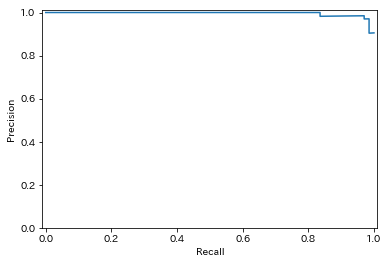

In [28]:
test_score = clf.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, test_score) # 適合率と再現率のトレードオフ関係をplotする。
# 適合率, 再現率, それぞれでのthresholds　が返される。
plt.plot(recall, precision)

plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [29]:
thresholds # precisionとrecallを計算するために使用される決定関数のしきい値を上げるリスト

array([-2.64194225, -2.33577584, -1.56454756, -1.55685536, -1.39088753,
       -1.21993165, -1.16447765, -0.70758966, -0.54241801, -0.3003642 ,
        0.44554447,  0.5339188 ,  1.4061065 ,  1.45199757,  1.50021432,
        1.66215989,  1.6644532 ,  1.78199897,  2.04035426,  2.08767243,
        2.15729308,  2.50811154,  3.34665151,  3.47348456,  3.48775689,
        3.54862805,  3.64378803,  3.76381495,  3.95479504,  4.08853736,
        4.18941011,  4.19958431,  4.20162762,  4.42372201,  4.499354  ,
        4.58426235,  4.60510863,  4.63652908,  4.76608898,  4.91800594,
        4.94330155,  5.0158041 ,  5.04499103,  5.25274754,  5.27213389,
        5.3688467 ,  5.45614481,  5.48161342,  5.48651178,  5.5217715 ,
        5.74124607,  5.82906072,  5.85135324,  5.91674641,  5.95377087,
        6.17257661,  6.18418221,  6.30547123,  6.34482014,  6.3840731 ,
        6.40564902,  6.42941449,  6.52075113,  6.74217562,  6.98870391,
        7.05356876,  7.2401315 ,  7.9644985 ,  8.021093  ,  8.11

In [30]:
seed = np.random.RandomState(1)
seed.uniform(size=2)

array([ 0.417022  ,  0.72032449])

result AUC =  0.994283899651
chance AUC =  0.52746903779
perfect AUC =  1.0


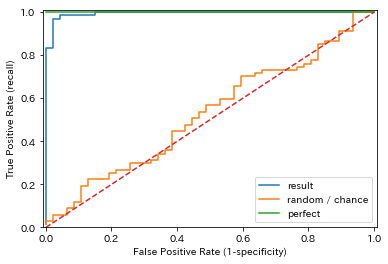

In [31]:
test_score = clf.decision_function(X_test)
# test_score = clf.predict_proba(X_test)[:,1] でもできる これは　第一列(class 1 )を陽性と考えているということ?
fpr, tpr, thresholds1 = roc_curve(y_test, test_score)  
# pos_label引数は  Label considered as positive and others are considered negative. ということ
# つまり、pos_label引数でどれを陽性クラスとするのかが指定できる。 defalutは　1クラスを陽性と思う。

plt.plot(fpr, tpr, label="result")
print("result AUC = ", auc(fpr, tpr))

test_score = seed.uniform(size=y_test.size)# もしまったくランダムなら 常に正の値を出力する識別器
fpr, tpr, thresholds2 = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label="random / chance")
print("chance AUC = ", auc(fpr, tpr))

fpr, tpr, thresholds3 = roc_curve(y_test, y_test) # 完璧なら
plt.plot(fpr, tpr, label="perfect")
print("perfect AUC = ", auc(fpr, tpr))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

In [32]:
seed.uniform(size=y_test.size)

array([ 0.75387619,  0.92302454,  0.71152476,  0.12427096,  0.01988013,
        0.02621099,  0.02830649,  0.24621107,  0.86002795,  0.53883106,
        0.55282198,  0.84203089,  0.12417332,  0.27918368,  0.58575927,
        0.96959575,  0.56103022,  0.01864729,  0.80063267,  0.23297427,
        0.8071052 ,  0.38786064,  0.86354185,  0.74712164,  0.55624023,
        0.13645523,  0.05991769,  0.12134346,  0.04455188,  0.10749413,
        0.22570934,  0.71298898,  0.55971698,  0.01255598,  0.07197428,
        0.96727633,  0.56810046,  0.20329323,  0.25232574,  0.74382585,
        0.19542948,  0.58135893,  0.97001999,  0.8468288 ,  0.23984776,
        0.49376971,  0.61995572,  0.8289809 ,  0.15679139,  0.0185762 ,
        0.07002214,  0.48634511,  0.60632946,  0.56885144,  0.31736241,
        0.98861615,  0.57974522,  0.38014117,  0.55094822,  0.74533443,
        0.66923289,  0.26491956,  0.06633483,  0.3700842 ,  0.62971751,
        0.21017401,  0.75275555,  0.06653648,  0.2603151 ,  0.80

In [33]:
thresholds1, thresholds2, thresholds3

(array([  9.46715683,   2.04035426,   1.78199897,  -0.54241801,
         -0.70758966,  -1.16447765,  -2.33577584,  -2.64194225, -41.54830105]),
 array([  9.97322850e-01,   9.88861089e-01,   9.68261576e-01,
          9.57889530e-01,   9.44594756e-01,   9.29437234e-01,
          9.27508580e-01,   9.08535151e-01,   9.03401915e-01,
          8.83306091e-01,   8.78142503e-01,   8.76389152e-01,
          8.00744569e-01,   7.55463053e-01,   7.50942434e-01,
          7.50812103e-01,   7.48165654e-01,   6.99758360e-01,
          6.92322616e-01,   6.91877114e-01,   6.90896918e-01,
          6.85219500e-01,   6.78835533e-01,   6.70467510e-01,
          6.63794645e-01,   5.89305537e-01,   5.78389614e-01,
          5.73679487e-01,   5.58689828e-01,   5.35896406e-01,
          5.33165285e-01,   5.14889112e-01,   4.91573159e-01,
          4.47893526e-01,   4.21107625e-01,   4.17304802e-01,
          4.14055988e-01,   3.57269760e-01,   3.48898342e-01,
          3.26644902e-01,   3.13424178e-01,   3.02

Text(0,0.5,'Precision')

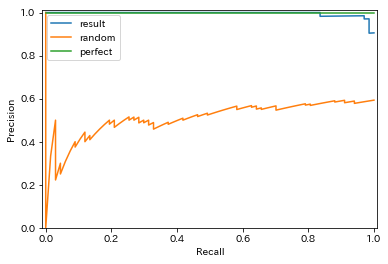

In [34]:
# 同じことをprecision_recall_curve についてもやってみる。　これは右上に行けば行くほど良い識別器ということ
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label="result")

test_score = seed.uniform(size=y_test.size) # もしまったくランダムなら
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label="random")

precision, recall, _ = precision_recall_curve(y_test, y_test) # 完璧なら
plt.plot(recall, precision, label="perfect")

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

http://homepages.inf.ed.ac.uk/ckiw/postscript/ijcv_voc09.pdf for average precision and interpolation

上のprecision_recall_curveで、ランダムなものが右上に近づいているかどうかがわからない場合、
少し補間してやるとみやすくなる。

In [35]:
test_score = np.random.uniform(size=y_test.size) # もしまったくランダムなら
precision, recall, _ = precision_recall_curve(y_test, test_score)

precision_interp = np.maximum.accumulate(precision) # 補間してやる。

In [36]:
a = seed.uniform(size=5)
a

array([ 0.0987434 ,  0.65130433,  0.70351699,  0.61024081,  0.79961526])

In [37]:
np.maximum.accumulate(a) # インデックスに沿ってマックスを累積値で取って来る。

array([ 0.0987434 ,  0.65130433,  0.70351699,  0.70351699,  0.79961526])

In [38]:
precision

array([ 0.5877193 ,  0.5840708 ,  0.58928571,  0.58558559,  0.58181818,
        0.58715596,  0.58333333,  0.57943925,  0.5754717 ,  0.58095238,
        0.57692308,  0.58252427,  0.57843137,  0.58415842,  0.58      ,
        0.58585859,  0.58163265,  0.57731959,  0.57291667,  0.57894737,
        0.57446809,  0.58064516,  0.58695652,  0.58241758,  0.57777778,
        0.57303371,  0.56818182,  0.56321839,  0.55813953,  0.56470588,
        0.57142857,  0.56626506,  0.57317073,  0.58024691,  0.575     ,
        0.56962025,  0.56410256,  0.55844156,  0.55263158,  0.56      ,
        0.55405405,  0.54794521,  0.54166667,  0.54929577,  0.55714286,
        0.55072464,  0.54411765,  0.53731343,  0.54545455,  0.53846154,
        0.53125   ,  0.53968254,  0.5483871 ,  0.54098361,  0.53333333,
        0.52542373,  0.51724138,  0.50877193,  0.5       ,  0.50909091,
        0.5       ,  0.49056604,  0.5       ,  0.50980392,  0.52      ,
        0.53061224,  0.54166667,  0.53191489,  0.52173913,  0.51

In [39]:
precision_interp

array([ 0.5877193 ,  0.5877193 ,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58928571,
        0.58928571,  0.58928571,  0.58928571,  0.58928571,  0.58

In [40]:
recall

array([ 1.        ,  0.98507463,  0.98507463,  0.97014925,  0.95522388,
        0.95522388,  0.94029851,  0.92537313,  0.91044776,  0.91044776,
        0.89552239,  0.89552239,  0.88059701,  0.88059701,  0.86567164,
        0.86567164,  0.85074627,  0.8358209 ,  0.82089552,  0.82089552,
        0.80597015,  0.80597015,  0.80597015,  0.79104478,  0.7761194 ,
        0.76119403,  0.74626866,  0.73134328,  0.71641791,  0.71641791,
        0.71641791,  0.70149254,  0.70149254,  0.70149254,  0.68656716,
        0.67164179,  0.65671642,  0.64179104,  0.62686567,  0.62686567,
        0.6119403 ,  0.59701493,  0.58208955,  0.58208955,  0.58208955,
        0.56716418,  0.55223881,  0.53731343,  0.53731343,  0.52238806,
        0.50746269,  0.50746269,  0.50746269,  0.49253731,  0.47761194,
        0.46268657,  0.44776119,  0.43283582,  0.41791045,  0.41791045,
        0.40298507,  0.3880597 ,  0.3880597 ,  0.3880597 ,  0.3880597 ,
        0.3880597 ,  0.3880597 ,  0.37313433,  0.35820896,  0.34

Text(0,0.5,'Precision')

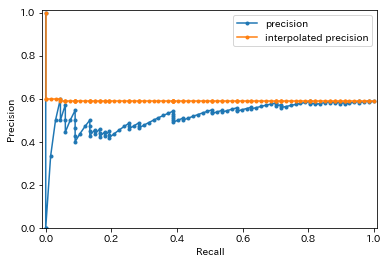

In [41]:
# plotしてやる
plt.plot(recall, precision, marker=".", label="precision")
plt.plot(recall, precision_interp, marker=".", label="interpolated precision") # 右からみていき、maxをとるようになっている。

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [42]:
# さらに線形補間したものの平均を取る。
all_precision = np.interp(np.arange(0, 1.1, 0.1),
                          recall[::-1],  # [::-1] は逆順をだす操作 , np.interp　ではx は０から始まっていないとだめ
                          precision_interp[::-1]) # 0, 0.1, 0.2, 0.3, ..., 0.9 での線形補間をする
AP = all_precision.mean() # 線形補間で得られた値の平均をとる。

線形補間については以下参照

https://ja.wikipedia.org/wiki/%E7%B7%9A%E5%BD%A2%E8%A3%9C%E9%96%93

In [43]:
print(all_precision)
print(AP)

[ 0.6         0.58928571  0.58928571  0.58928571  0.58928571  0.58928571
  0.58928571  0.58928571  0.58928571  0.58928571  0.5877193 ]
0.590117338802


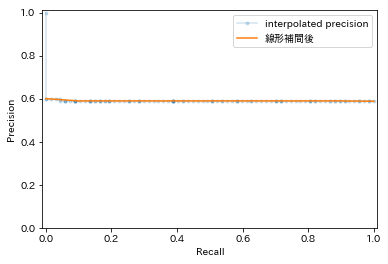

In [44]:
plt.plot(recall, precision_interp, marker=".", label="interpolated precision", alpha=0.2)
plt.plot(np.arange(0, 1.1, 0.1), all_precision, label='線形補間後')

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [45]:
# average_precisionを計算する　（上でやったことを関数でやってみる。）
def calc_AP(precision, recall):
    precision_interp = np.maximum.accumulate(precision)
    all_precision = np.interp(np.arange(0, 1.1, 0.1), recall[::-1], precision_interp[::-1])
    AP = all_precision.mean()
    return AP

In [46]:
test_score = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, test_score)
calc_AP(precision, recall)

0.99002308093217184

10 class problem 多クラス問題

In [47]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [48]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [49]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
test_score = clf.decision_function(X_test)
test_score[15:18, :]

array([[-21.29798835, -10.64086971, -17.67730727, -15.74398623,
        -15.05613992, -26.00827198,  16.54581776, -34.89052264,
         -2.02183789, -35.11720192],
       [-32.02640132,   9.91580545, -30.30957077, -25.31044268,
         -3.46439527, -18.44933836, -28.01457562, -28.27433   ,
         -6.02059625, -17.87312975],
       [ 16.02739527, -26.71673454, -11.77517932, -26.72774753,
        -16.69276642, -26.48484624, -23.97201373,  -5.54928633,
        -13.10250291, -14.6316392 ]])

正になっているところが所属するクラスと予測される。

In [51]:
(y_test==0).astype(int)[15: 18]

array([0, 0, 1])

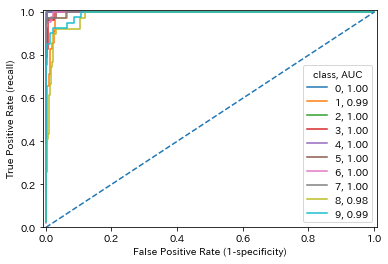

In [52]:
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), test_score[:,i]) #  クラスi を陽性(1)と考える 。一対他　の方式を使えばMulticlassでもROC曲線がかける
    plt.plot(fpr, tpr, label="{0}, {1:.2f}".format(i, auc(fpr, tpr)))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best", title="class, AUC")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

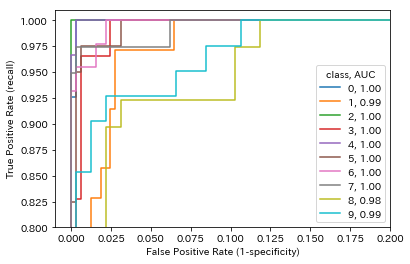

In [53]:
# 左上を拡大してみる。
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), 
                            test_score[:,i])
    plt.plot(fpr, tpr, label="{0}, {1:.2f}".format(i, auc(fpr, tpr)))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best", title="class, AUC")
plt.xlim([-0.01, 0.2])
plt.ylim([0.8, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

Text(0,0.5,'Precision')

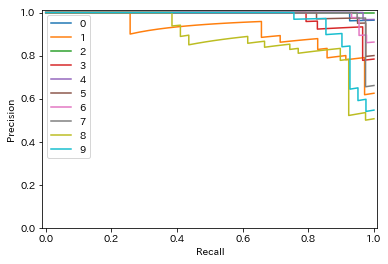

In [54]:
# 同様のことを precision_recall_curve で行う。
for i in range(10):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), 
                            test_score[:,i])
    plt.plot(recall, precision, label="{0}".format(i))
             
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [55]:
# mAP of PASCAL VOC by http://homepages.inf.ed.ac.uk/ckiw/postscript/ijcv_voc09.pdf
# mean average  precisionを計算する。
APs = []
for i in range(10):

    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), test_score[:,i])
    APs.append( calc_AP(precision, recall) )
    
APs = np.array(APs)
mAP = APs.mean()

print(APs) # それぞれのクラスのaverage precision
print("mAP = ", mAP) # 全てのクラスのaverage precisionの平均

[ 0.99675325  0.91181621  1.          0.97064701  0.99706745  0.97948718
  0.98752228  0.96918336  0.88130281  0.94739345]
mAP =  0.964117300155


In [56]:
def calc_AP(precision, recall):
    precision_interp = np.maximum.accumulate(precision) # 補間(累積の最大値)
    all_precision = np.interp(np.arange(0, 1.1, 0.1), recall[::-1], precision_interp[::-1]) # さらに線形補間
    AP = all_precision.mean()
    return AP

In [57]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import LabelBinarizer

avg_precision = []
y_test_binary = LabelBinarizer().fit_transform(y_test)
for i in range(10):
    avg_precision.append(average_precision_score(y_test_binary[:, i], clf.decision_function(X_test)[:, i]) )
# この関数で正確な平均適合率(average_percision) がわかる。　多クラス問題ではどこが陽性か指定しないと　mAP が帰って来る

avg_precision = np.array(avg_precision)
avg_precision.ravel()

array([ 0.99730551,  0.91587987,  1.        ,  0.98147065,  0.99892473,
        0.99039716,  0.9939846 ,  0.99065066,  0.88561015,  0.95913417])

In [58]:
avg_precision.mean()

0.97133575153056362

In [59]:
import pandas as pd
average_precision_score(pd.get_dummies(y_test).values, clf.decision_function(X_test))

0.97133575153056362

In [60]:
from sklearn.preprocessing import LabelBinarizer

In [61]:
LabelBinarizer().fit_transform(y_test)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [62]:
pd.get_dummies(y_test).values

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

[scikit-learnでMean Average Precisionを計算しようと思ったら混乱した話](http://sucrose.hatenablog.com/entry/2017/02/26/224559)

In [63]:
from sklearn.metrics import label_ranking_average_precision_score

In [70]:
label_ranking_average_precision_score(y_true=y_test_binary, y_score=clf.predict_proba(X_test))

0.97175925925925921